# Análise de Dados Magalu

## Análise de Dados de Smartphones, Notebooks e Smart TVs

### Análise de Dados: Notebooks

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('output/dataset_notebook.csv', sep=';')

In [3]:
df.head()

,descricao,preco,avaliacao,quantidade_avaliacoes,URL
0,Notebook Acer Aspire 5 A515-54-57EN Intel Core i5,3419.1,3,34,https://www.magazineluiza.com.br/notebook-acer...
1,"Notebook Dell Inspiron i3501-M10P 15.6"" HD 11ª...",2699.1,4,107,https://www.magazineluiza.com.br/notebook-dell...
2,Notebook Samsung Book NP550XDA-KF2BR Intel Cor...,3329.1,4,8,https://www.magazineluiza.com.br/notebook-sams...
3,Notebook Dell Inspiron 15 3000 3501-A25P,2879.1,4,5,https://www.magazineluiza.com.br/notebook-dell...
4,Notebook HP 256 G8 Intel Core i3 8GB 256GB SSD,2924.1,4,26,https://www.magazineluiza.com.br/notebook-hp-2...


In [4]:
df.count()

descricao                1016
preco                    1006
avaliacao                1016
quantidade_avaliacoes    1016
URL                      1016
dtype: int64

## Verificação de Valores Nulos: NaN

In [5]:
df.isnull().sum().sum()

10

In [6]:
df['preco'].isnull().sum()

10

A coluna de preços contém valores nulos. É melhor excluir esses registros do que substituir por um valor de preço = 0

In [7]:
df = df.dropna()

In [8]:
df.count()

descricao                1006
preco                    1006
avaliacao                1006
quantidade_avaliacoes    1006
URL                      1006
dtype: int64

Agora os registros com preço nulo foram excluídos do dataframe

## Estatística descritiva

Seguem algumas estatísticas descritivas relativas aos smartphones:

In [9]:
df.describe()

,preco,avaliacao,quantidade_avaliacoes
count,1006.000000,1006.000000,1006.000000
mean,4844.466610,4.815109,1.816103
std,4612.089962,0.581309,9.059284
min,39.990000,1.000000,0.000000
25%,2850.457500,5.000000,0.000000
50%,3893.510000,5.000000,0.000000
75%,5399.100000,5.000000,0.000000
max,94999.050000,5.000000,123.000000


## Histograma: Distribuição de Frequencias

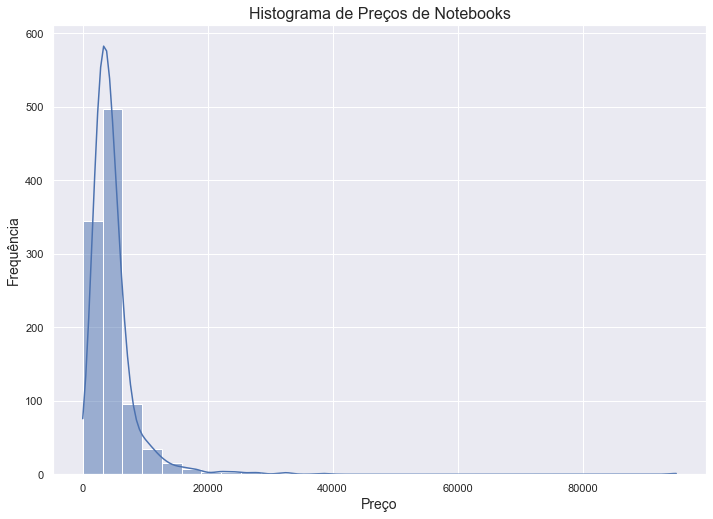

In [39]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
histplot = sns.histplot(data=df, x='preco', linewidth=1, bins=30, kde=True)
histplot.axes.set_title("Histograma de Preços de Notebooks", fontsize=16)
histplot.set_xlabel("Preço", fontsize=14)
histplot.set_ylabel("Frequência", fontsize=14)
plt.show()

A distribuição é fortemente assimétrica dada a presença de outliers

## Boxplot: Visualização de outliers

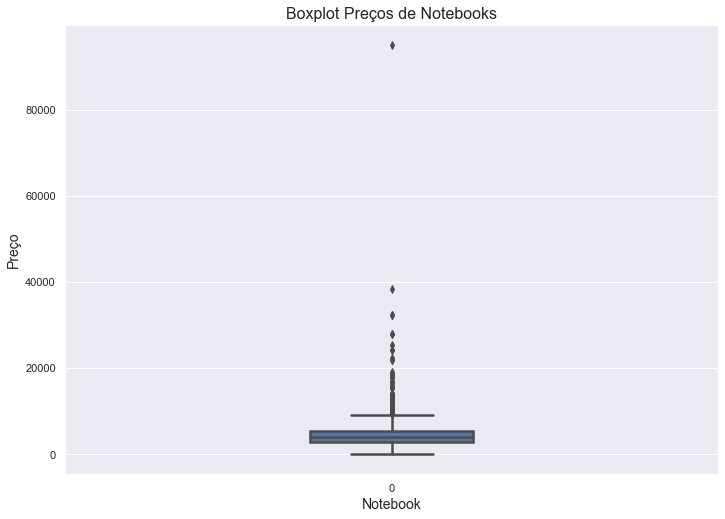

In [41]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
boxplot = sns.boxplot(data=df['preco'], linewidth=2.5, width=0.25)
boxplot.axes.set_title("Boxplot Preços de Notebooks", fontsize=16)
boxplot.set_xlabel("Notebook", fontsize=14)
boxplot.set_ylabel("Preço", fontsize=14)
plt.show()

### Remoção de Outliers

Percebe-se que há outliers no departamento de smartphones.

Podem ser acessórios para smartphones com preços muito baixos, ou celulares com preços muito acima da média

Haverá agora um trabalho de remoção de outliers do nosso dataset

### Função que retira os indices dos outliers do nosso dataframe

In [12]:
def outliers_indexes(df, ft):
    """ 
    Função que retorna o índice dos outliers
    Embasamento matemático:
    Amplitude Interquartil => IQR = Quartil_3 - Quartil_1
    Limite Inferior => LI = Quartil_1 - 1.5*IQR
    Limite Superior => LS = Quartil_3 + 1.5*IQR
    Todos os dados que estiverem acima do limite superior ou abaixo do limite inferior, são outliers
    """
    Q1 = df[ft].quantile(0.25)
    Q3 = df[ft].quantile(0.75)
    IQR = Q3 - Q1
    
    LI = Q1 - 1.5*IQR
    LS = Q3 + 1.5*IQR
    
    lista_indices = df.index[ (df[ft] < LI) | (df[ft] > LS) ]
    
    return lista_indices

In [13]:
# Cria-se uma lista vazia para armazenar os índices de saídas de múltiplas colunas 
# (somente caso se quisesse tirar outliers de multiplas colunas)
index_list = []
for feature in ['preco', 'quantidade_avaliacoes']:
    index_list.extend(outliers_indexes(df, feature))

Será usada uma versão mais simples, apenas para retornar os índices de uma única coluna, o preço

In [14]:
outliers_index_list = outliers_indexes(df, 'preco')

In [15]:
outliers_index_list

Int64Index([  79,  107,  132,  133,  148,  155,  163,  165,  189,  191,  204,
             224,  246,  256,  265,  269,  274,  279,  363,  372,  375,  380,
             387,  409,  413,  426,  427,  439,  445,  447,  453,  463,  470,
             472,  497,  515,  533,  556,  564,  596,  597,  598,  611,  631,
             633,  642,  649,  652,  669,  670,  682,  690,  707,  728,  730,
             736,  745,  748,  749,  773,  779,  784,  786,  806,  814,  820,
             828,  840,  844,  887,  894,  911,  921,  923,  924,  963,  981,
            1012],
           dtype='int64')

In [16]:
len(outliers_index_list)

78

### Função de Remoção de Outliers

Por fim, define-se uma função para a remoção de todos os registros que contém outliers, tendo a lista de índices como input

In [17]:
def remove_outliers(df, index_list):
    index_list = sorted(set(index_list))
    # Drop dos outliers
    df = df.drop(index_list)
    return df   

### Limpa-se o dataframe dos outliers

In [18]:
df_clean = remove_outliers(df, outliers_index_list)

In [19]:
df_clean.shape

(928, 5)

### Remove-se os itens com valor muito baixo

In [43]:
df_mask = df_clean['preco'] >= 300
df_clean = df_clean[df_mask]

## Histograma: Distribuição de Frequência (Outliers removidos)

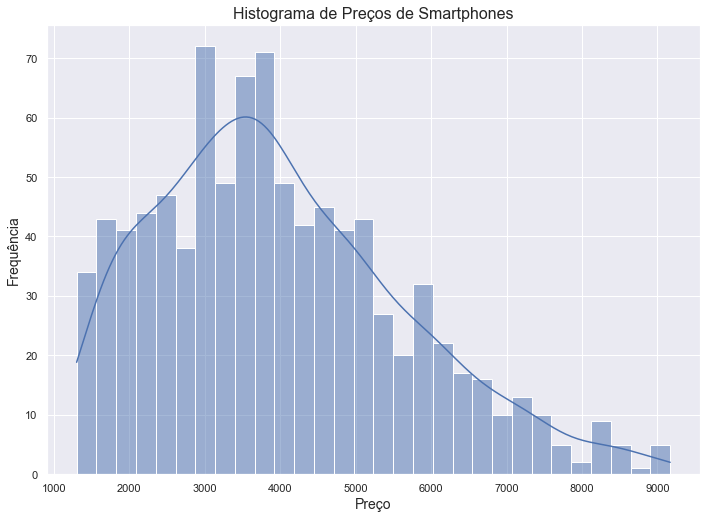

In [44]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
histplot = sns.histplot(data=df_clean, x='preco', linewidth=1, bins=30, kde=True)
histplot.axes.set_title("Histograma de Preços de Smartphones", fontsize=16)
histplot.set_xlabel("Preço", fontsize=14)
histplot.set_ylabel("Frequência", fontsize=14)
plt.show()

Nota-se maior simetria na distribuição após a remoção dos outliers, ainda que esta não seja uma distribuição Gaussiana

## Boxplot sem Outliers

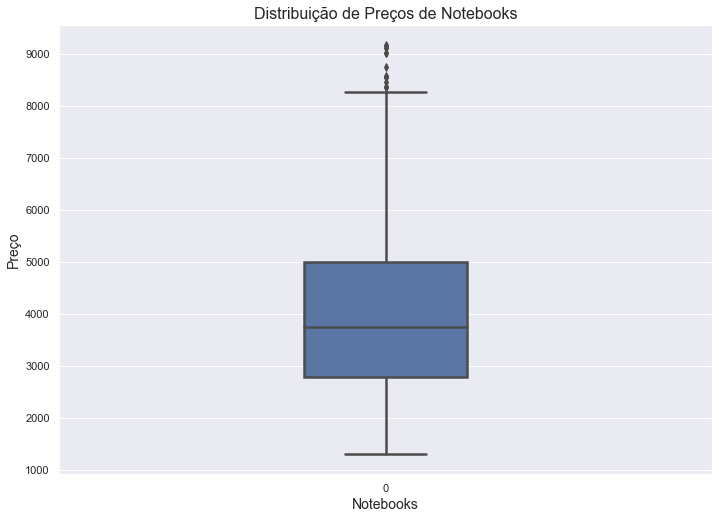

In [52]:
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
boxplot = sns.boxplot(data=df_clean['preco'], linewidth=2.5, width=0.25)
boxplot.axes.set_title("Distribuição de Preços de Notebooks", fontsize=16)
boxplot.set_xlabel("Notebooks", fontsize=14)
boxplot.set_ylabel("Preço", fontsize=14)
plt.show()

## Estatística descritiva, sem outliers

In [46]:
df_clean.describe()

,preco,avaliacao,quantidade_avaliacoes
count,920.000000,920.000000,920.000000
mean,3988.260685,4.801087,1.970652
std,1658.279163,0.597964,9.455595
min,1302.000000,1.000000,0.000000
25%,2789.100000,5.000000,0.000000
50%,3735.725000,5.000000,0.000000
75%,4999.225000,5.000000,0.000000
max,9167.500000,5.000000,123.000000


Verifica-se assim que:
 - A média de preço de um Smartphone está em torno de 4000,00 reais, com 1700,00 reais para mais ou para menos
 - A Mediana do preço de um smartphone é 3700 reais
 - A média de quantidade de avaliações é 2 por produto. A baixa quantidade pode indicar que essa medida não é confiável

## Item Mais Caro (Outliers não removidos)

In [47]:
df_mask = df['preco']==max(df['preco'])
filtered_df = df[df_mask]
print(filtered_df)

                                             descricao     preco  avaliacao  \
840  Notebook Acer Aspire 5 A515-54-70CM Intel Core...  94999.05          5   

     quantidade_avaliacoes                                                URL  
840                      0  https://www.magazineluiza.com.br/notebook-acer...  


## Item Mais Caro (Outliers Removidos)

In [48]:
df_mask = df_clean['preco'] == max(df_clean['preco'])
filtered_df = df_clean[df_mask]
print(filtered_df)

                                             descricao   preco  avaliacao  \
499  Notebook Gamer Predator Helios 300 PH315-53-75...  9167.5          5   

     quantidade_avaliacoes                                                URL  
499                      0  https://www.magazineluiza.com.br/notebook-game...  


## Item mais barato

In [49]:
df_mask = df_clean['preco'] >= 300
filtered_df = df_clean[df_mask]
print(filtered_df.sort_values(by=['preco'], ascending=True)[:5])

                                             descricao    preco  avaliacao  \
535  Notebook Multilaser Legacy Cloud 64GB 2GB 14" ...  1302.00          5   
429  Notebook Intel Celeron 4GB RAM 64GB Multilaser...  1348.20          5   
113  Notebook 14" legacy cloud atom/2gb/32gb win10 ...  1356.06          3   
721  Notebook Positivo Motion Red Q232B Intel Quad ...  1376.55          5   
236  Notebook Multilaser Legacy Intel Atom Quad Z83...  1386.05          5   

     quantidade_avaliacoes                                                URL  
535                      0  https://www.magazineluiza.com.br/notebook-mult...  
429                      0  https://www.magazineluiza.com.br/notebook-inte...  
113                     18  https://www.magazineluiza.com.br/notebook-14-l...  
721                      0  https://www.magazineluiza.com.br/notebook-posi...  
236                      0  https://www.magazineluiza.com.br/notebook-mult...  


 Notebook Multilaser Legacy Cloud 64GB 2GB 14" de 1302 reais

## 5 itens com preço menor ou igual a média

In [50]:
df_mask = df_clean['preco'] <= df_clean['preco'].mean()
filtered_df = df_clean[df_mask]
print(filtered_df.sort_values(by=['preco'], ascending=False)[:5])

                                             descricao    preco  avaliacao  \
741  Notebook Samsung Book Intel Core i5 Windows 10...  3986.62          5   
620  Notebook Dell Inspiron 3501 - Intel i3 1005G1,...  3980.49          5   
789  Notebook Samsung Galaxy Book GO Sdragon 7c Oct...  3960.87          5   
522  Notebook Lenovo V14 i5-1135G7 8GB 256GB SSD In...  3959.10          5   
137  Kit Notebook 2 em 1 Dell Inspiron 5406-OS10SF ...  3959.10          5   

     quantidade_avaliacoes                                                URL  
741                      0  https://www.magazineluiza.com.br/notebook-sams...  
620                      0  https://www.magazineluiza.com.br/notebook-dell...  
789                      0  https://www.magazineluiza.com.br/notebook-sams...  
522                      0  https://www.magazineluiza.com.br/notebook-leno...  
137                      0  https://www.magazineluiza.com.br/kit-notebook-...  


Estes itens são considerados mid-range e tem uma boa relação custo-benefício.